In [31]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded


In [53]:
date = "JUN13"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

df = df.Define("D0GenPT", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[0]")\
    .Define("D0GenPhi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[1]")\
    .Define("D0GenEta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[2]")\
    .Define("D0StarGenPT", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[0]")\
    .Define("D0StarGenPhi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[1]")\
    .Define("D0StarGenEta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[0]")\
    .Define("PhotonGenPT", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[0]")\
    .Define("PhotonGenPhi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[1]")\
    .Define("PhotonGenEta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[0]")\
    .Define("DRGen", "ROOT::VecOps::DeltaR(D0GenEta, PhotonGenEta, D0GenPhi, PhotonGenPhi)")\
    .Define("DRReco", "ROOT::VecOps::DeltaR(goodMeson_eta[0], goodPhotons_eta[0], goodMeson_phi[0], goodPhotons_phi[0])")


date = "JUN13"

chainBKG = ROOT.TChain("events")
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_D0StarCat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_D0StarCat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_D0StarCat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_D0StarCat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_D0StarCat_2018.root".format(date))
dg = ROOT.RDataFrame(chainBKG)

dg = dg.Define("size", "goodMeson_pt.size()").Define("sizePhoton", "goodPhotons_pt.size()")\
    .Filter("size == 1").Filter("sizePhoton == 1")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


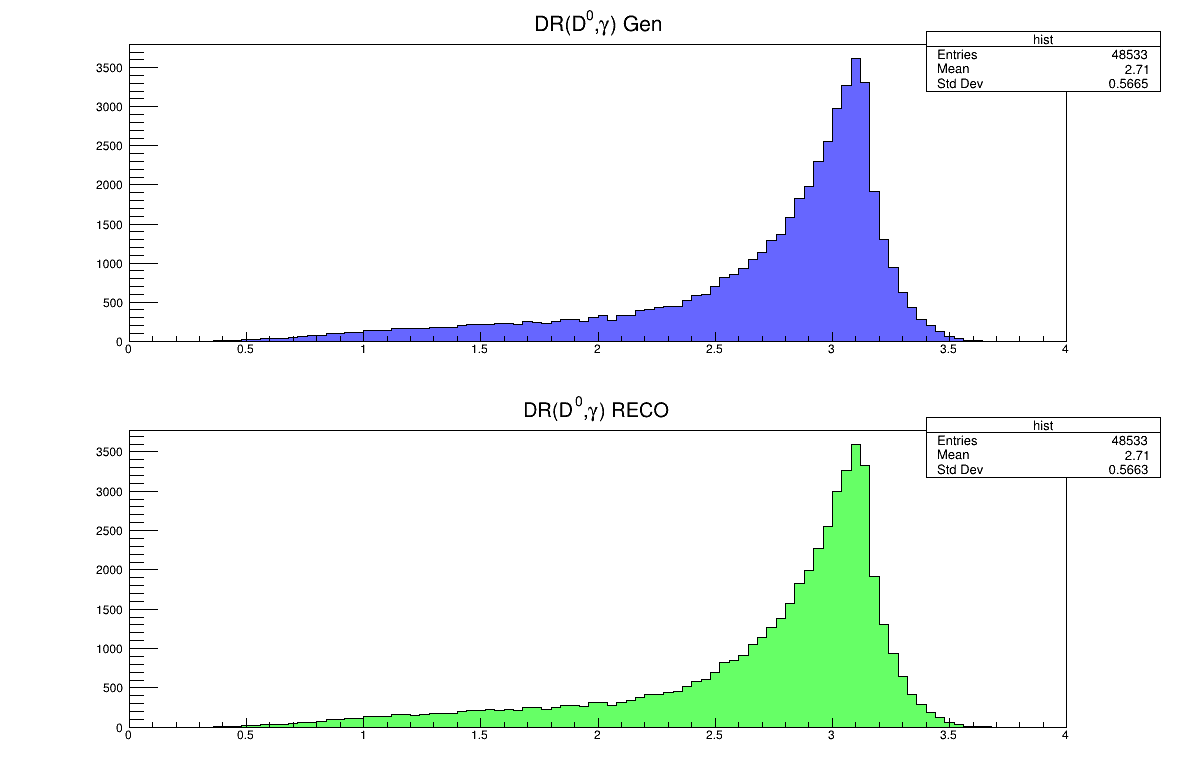

In [63]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

canvas.Divide(1, 2)

bins, xlow, xhigh = 100, 0, 4

hgen=df.Histo1D(("hist", "DR(D^{0},#gamma) Gen", bins, xlow, xhigh),"DRGen")

hreco=df.Histo1D(("hist", "DR(D^{0},#gamma) RECO", bins, xlow, xhigh),"DRReco")

hgen.SetFillColor(ROOT.kBlue-7)
hgen.SetLineColor(ROOT.kBlack)
hreco.SetFillColor(ROOT.kGreen-7)
hreco.SetLineColor(ROOT.kBlack)

canvas.cd(1)
hgen.Draw("hist")
canvas.cd(2)
hreco.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


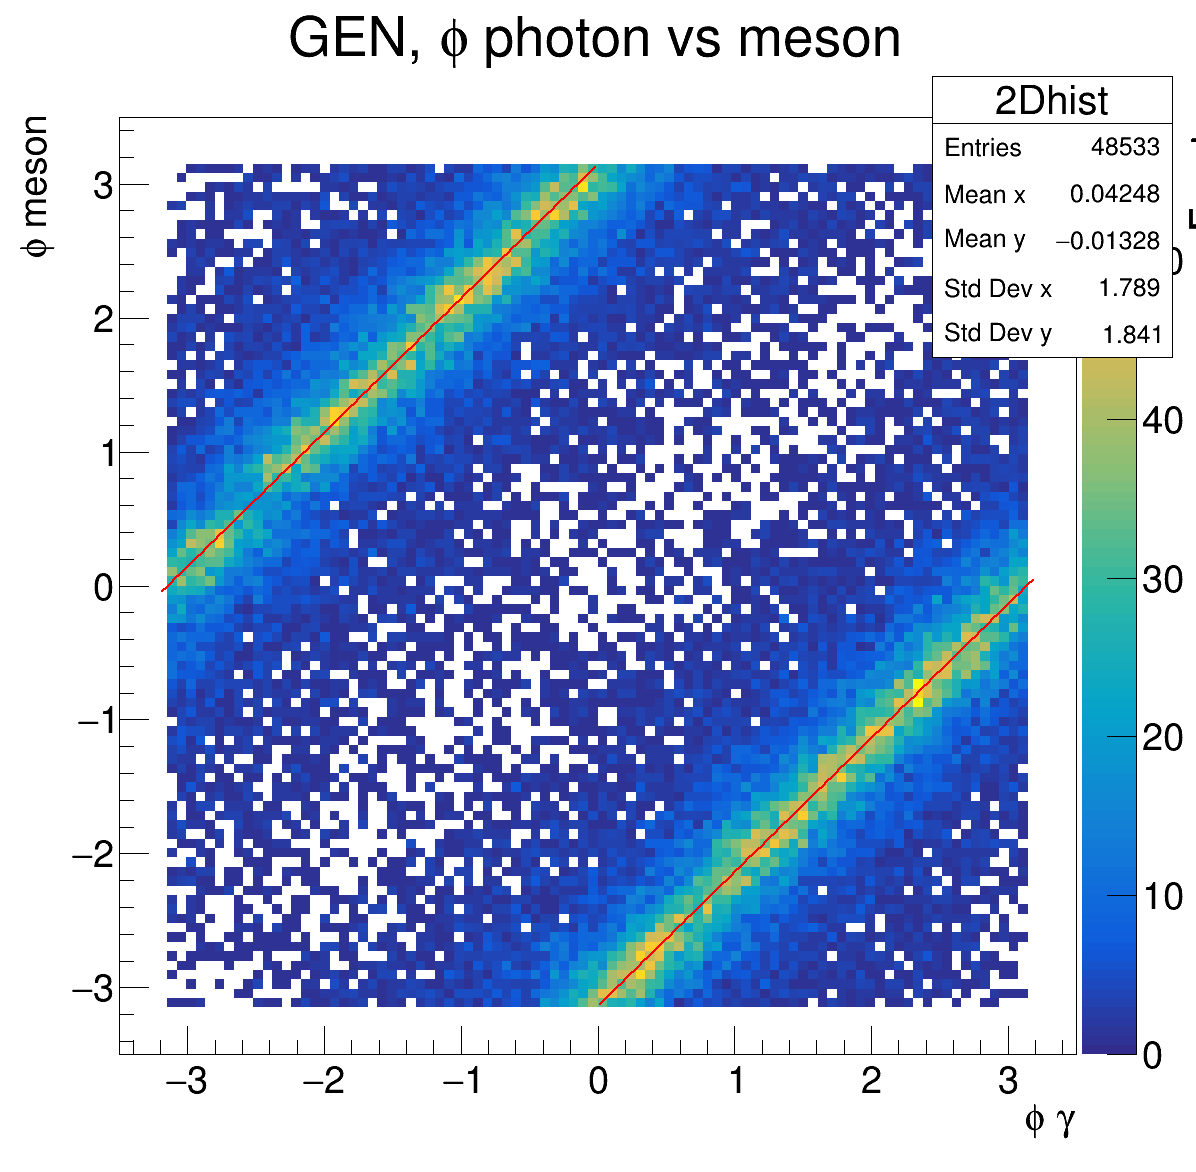

In [55]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh = 100, -3.5, 3.5

var = "#phi"

h = df.Histo2D(("2Dhist", "GEN, {} photon vs meson".format(var), nbins, xlow, xhigh, nbins, xlow, xhigh), "PhotonGenPhi", "D0GenPhi")

h.GetXaxis().SetTitle("{} #gamma".format(var))
h.GetYaxis().SetTitle("{} meson".format(var))
h.GetZaxis().SetTitle("Events")

h.SetContour(100)
h.Draw("colz")

f1 = ROOT.TF1("f1", "[0]+[1]*x", -3.2, 0)
f1.SetParameters(3.14159, 1.)
f1.SetLineColor(ROOT.kRed)
#h.Fit(f1)
f1.Draw("same")

f2 = ROOT.TF1("f1", "[0]+[1]*x", 0, 3.2)
f2.SetParameters(-3.14159, 1.)
f2.SetLineColor(ROOT.kRed)
#h.Fit(f1)
f2.Draw("same")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas3


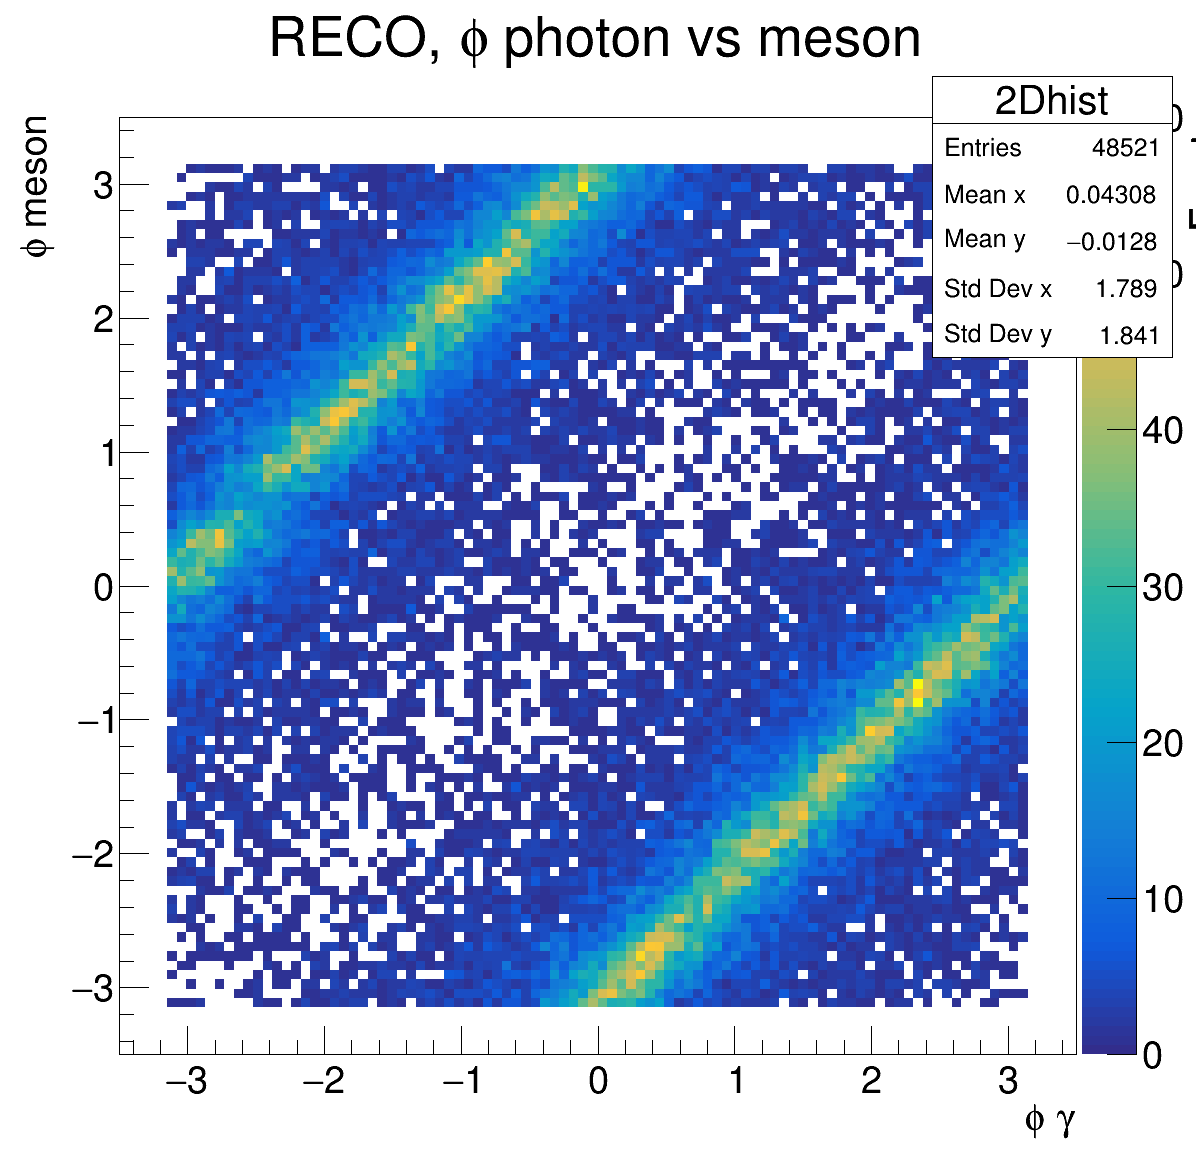

In [57]:
canvas4 = ROOT.TCanvas("canvas3", "canvas", 1200, 1200)

nbins, xlow, xhigh = 100, -3.5, 3.5

var = "#phi"

dfext = df.Filter("size == 1").Filter("sizePhoton == 1")

h = dfext.Histo2D(("2Dhist", "RECO, {} photon vs meson".format(var), nbins, xlow, xhigh, nbins, xlow, xhigh), "goodPhotons_phi", "goodMeson_phi")

h.GetXaxis().SetTitle("{} #gamma".format(var))
h.GetYaxis().SetTitle("{} meson".format(var))
h.GetZaxis().SetTitle("Events")

h.SetContour(100)
h.Draw("colz")

canvas4.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas3


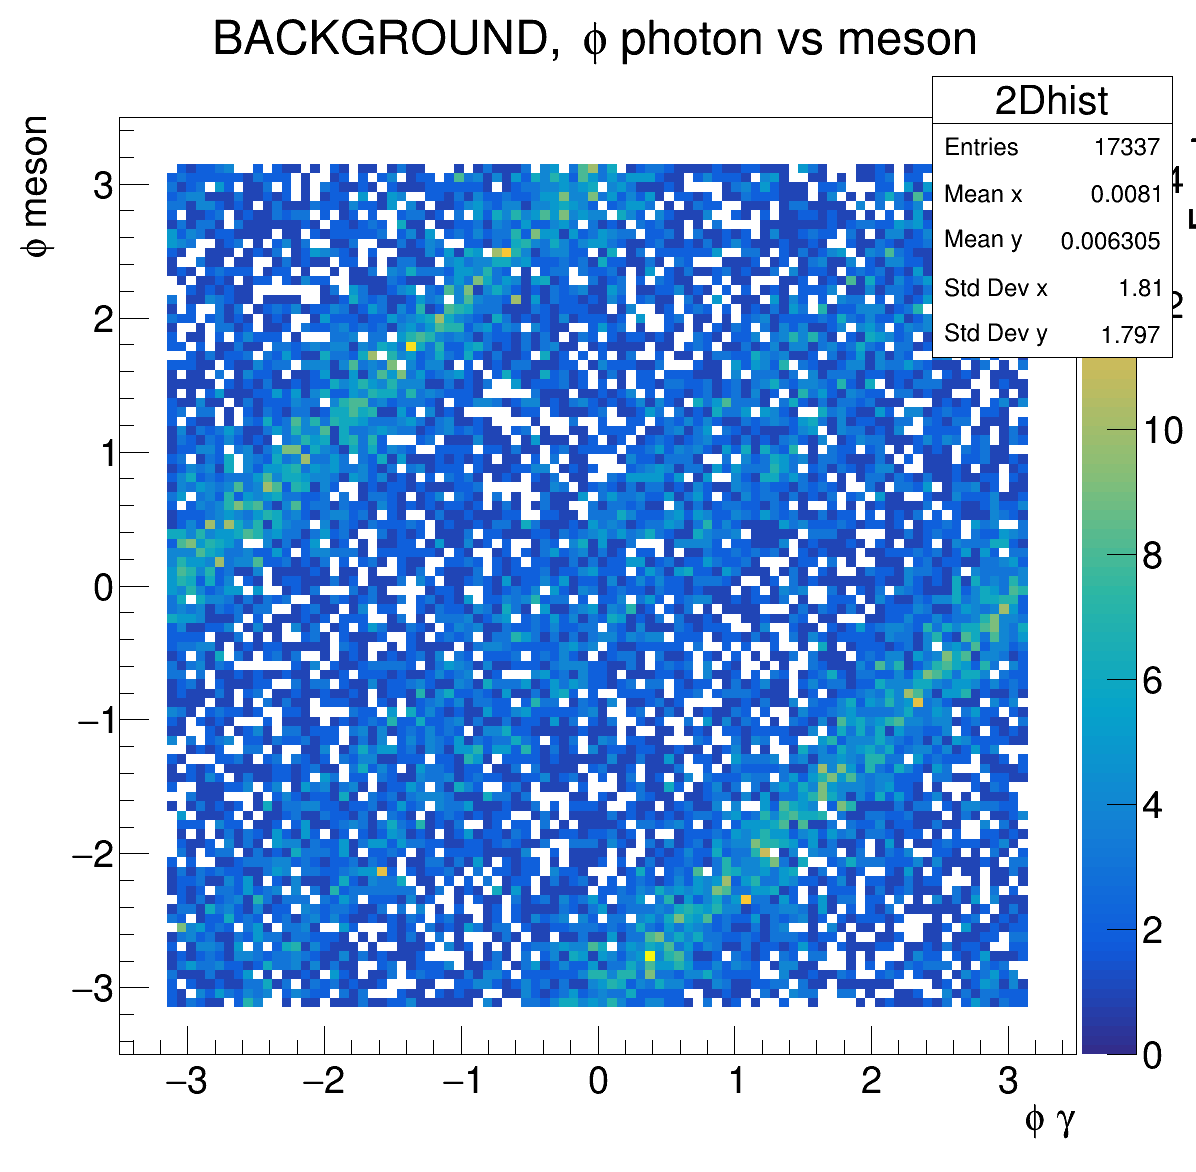

In [58]:
canvas3 = ROOT.TCanvas("canvas3", "canvas", 1200, 1200)

nbins, xlow, xhigh = 100, -3.5, 3.5

var = "#phi"

hb = dg.Histo2D(("2Dhist", "BACKGROUND, {} photon vs meson".format(var), nbins, xlow, xhigh, nbins, xlow, xhigh), "goodPhotons_phi", "goodMeson_phi")

hb.GetXaxis().SetTitle("{} #gamma".format(var))
hb.GetYaxis().SetTitle("{} meson".format(var))
hb.GetZaxis().SetTitle("Events")

hb.SetContour(100)
hb.Draw("colz")

canvas3.Draw()


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  5.01306e+06
NDf                       =         3271
Edm                       =  8.99566e-07
NCalls                    =          263
p0                        =      59.0234   +/-   0.650081    
p1                        =      84.6984   +/-   13.6664     
p2                        =      34.4451   +/-   0.579854    


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


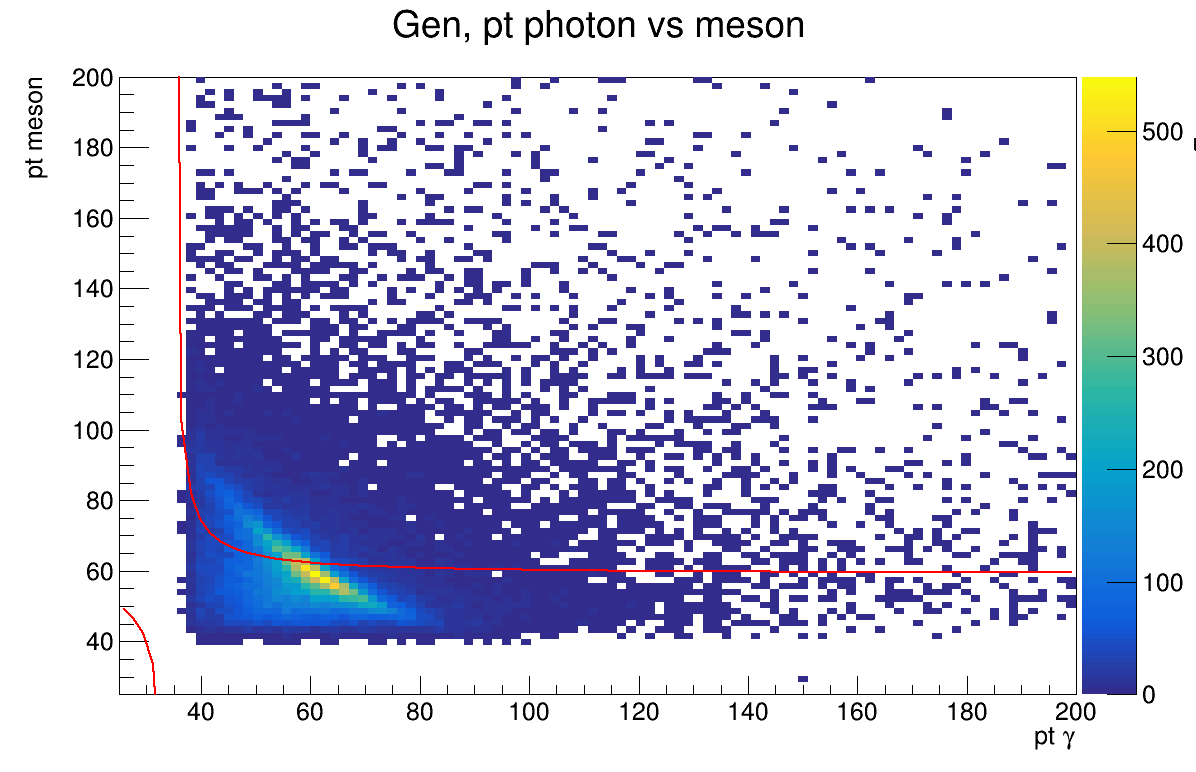

In [59]:
canvas2 = ROOT.TCanvas("canvas", "canvas", 1200, 800)

nbins, xlow, xhigh = 100, 25, 200

var = "pt"

h = df.Histo2D(("2Dhist", "Gen, {} photon vs meson".format(var), nbins, xlow, xhigh, nbins, xlow, xhigh), "PhotonGenPT", "D0GenPT")

h.GetXaxis().SetTitle("{} #gamma".format(var))
h.GetYaxis().SetTitle("{} meson".format(var))
h.GetZaxis().SetTitle("Events")

h.SetContour(100)
h.Draw("colz")
h.SetStats(0)
#canvas.SetRightMargin(0.13)

f1 = ROOT.TF1("f1", "[0]+[1]/(x-[2])", 25, 200)
f1.SetParameters(21., 1382., 21.)
f1.SetLineColor(ROOT.kRed)
h.Fit(f1)
f1.Draw("same")

canvas2.Draw()

In [60]:
dfnew = df.Filter("size  > 1")

cols = ["D0GenPT", "goodMeson_pt", "goodPhotons_phi", "D0GenPhi", "goodMeson_phi", "Metric", "DRGen", "DRReco"]

x = dfnew.AsNumpy(columns=cols)

#print(df.AsNumpy(columns=cols)["mc"][0])

pddf = pd.DataFrame(x)

display(pddf)
#print(set(pddf["mc"]))

,D0GenPT,goodMeson_pt,goodPhotons_phi,D0GenPhi,goodMeson_phi,Metric,DRGen,DRReco


In [27]:
ptgen = np.array([x for x in pddf["D0GenPT"].tolist()])
ptreco = np.array([x[0] for x in pddf["goodMeson_pt"].tolist()])
print(ptgen, len(ptgen))
print(ptreco, len(ptreco))

[ 61.625 215.     61.875 ...  65.    127.     61.25 ] 16922
[ 61.59715652 213.74256897  61.06000137 ...  65.28115845 126.67811584
  61.01682281] 16922


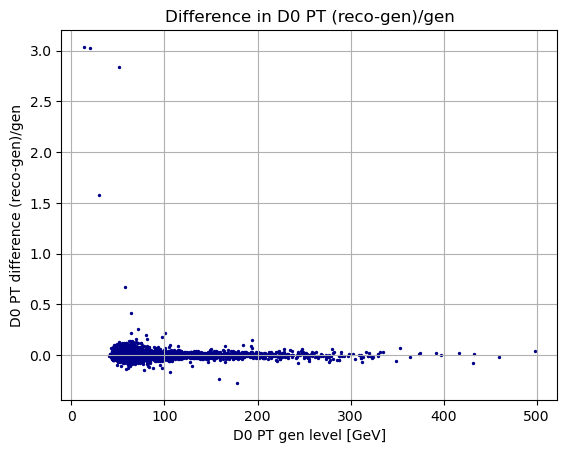

0.04122028298981575 2.0727763221032767


In [28]:
plt.scatter(ptgen, (ptreco-ptgen)/ptgen, s=2, color = "#000088")
plt.title("Difference in D0 PT (reco-gen)/gen")
plt.xlabel("D0 PT gen level [GeV]")
plt.ylabel("D0 PT difference (reco-gen)/gen")
plt.grid()
plt.show()
print(np.mean(ptreco-ptgen), np.std(ptreco-ptgen))